In [1]:
import os
import cv2
import shutil
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
class Image_Custom_Augmentation:

    def __init__(self, SP_intensity = False, RO_Key = False, Br_intensity = False, HV_Key = False, HE_Key = False):
        # Salt and Pepper Intensity
        self.SP_intensity = SP_intensity 
        # Brightness Intensity
        self.Br_intensity = Br_intensity 
        # Vertical/Horizontal Flip Key
        self.HV_Key = HV_Key 
        # Rotate Key
        self.RO_Key = RO_Key 
        # Histogram Equalization Key
        self.HE_Key = HE_Key 
        
        
    def Salt_n_Pepper(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        # Create a Salt&Pepper filter
        height, width, _ = image.shape

        # Generate random noise mask
        salt_mask = np.random.rand(height, width) < self.SP_intensity
        pepper_mask = np.random.rand(height, width) < self.SP_intensity
        
        # Apply salt noise
        image[salt_mask] = [255,255,255]  # Set pixel to white (salt)
        image[pepper_mask] = [0,0,0]  # Set pixel to black (pepper)

        # Save the modified image to the output path
        custom_name = f"{clean_label}"+"_SP_"+".jpg"
        output_path = os.path.join(output_dir, custom_name)
        cv2.imwrite(output_path, image)
        
        # Reset
        del salt_mask, pepper_mask, image, clean_label, output_path, custom_name
            
            
    def Histogram_Equalization(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        equalized_image = cv2.equalizeHist(gray_image)

        # Save the modified image to the output path
        custom_name = f"{clean_label}"+"_HE_"+".jpg"
        output_path = os.path.join(output_dir, custom_name)
        cv2.imwrite(output_path, equalized_image)

        # Reset
        del equalized_image, gray_image, image, clean_label, custom_name, output_path
     
    
    def Rotate(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        
        # Apply Rotation
        height, width = image.shape[:2]
        centerX, centerY = (width // 2, height // 2)
        
        "Get the rotation Matrix and apply it to the image"
        M_1 = cv2.getRotationMatrix2D((centerX, centerY), self.RO_Key, 1.0)
        M_2 = cv2.getRotationMatrix2D((centerX, centerY), -self.RO_Key, 1.0)
        ccw_rotated_image = cv2.warpAffine(image, M_1, (width, height))
        cw_rotated_image = cv2.warpAffine(image, M_2, (width, height))
    
        # Save the modified image to the output path
        custom_name_1 = f"{clean_label}"+"_CCWR_"+".jpg"
        custom_name_2 = f"{clean_label}"+"_CWR_"+".jpg"
        output_path_1 = os.path.join(output_dir, custom_name_1)
        output_path_2 = os.path.join(output_dir, custom_name_2)
        cv2.imwrite(output_path_1, ccw_rotated_image)
        cv2.imwrite(output_path_2, cw_rotated_image)
        
        # Reset
        del ccw_rotated_image, cw_rotated_image, custom_name_1, custom_name_2, output_path_1, output_path_2, image, clean_label
    
    
    def Brightness(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        # Create a 2D plate of same values to Add/Subtract from the initial image
        plate = np.ones(image.shape, dtype="uint8") * (self.Br_intensity)
        # Two different filters (Br/Da)
        brighter_img = cv2.add(image, plate)
        darker_img = cv2.subtract(image, plate)
        
        # Save the modified images to the output path
        custom_name_1 = f"{clean_label}"+"_BR_"+".jpg"
        custom_name_2 = f"{clean_label}"+"_DA_"+".jpg"
        output_path_1 = os.path.join(output_dir, custom_name_1)
        output_path_2 = os.path.join(output_dir, custom_name_2)
        cv2.imwrite(output_path_1, brighter_img)
        cv2.imwrite(output_path_2, darker_img)
        
        # Reset
        del brighter_img, darker_img, image, clean_label, custom_name_1, custom_name_2, output_path_1, output_path_2
        
        
    def Flip_HV(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        # Flip the image 
        V_flipped = cv2.flip(image, 0)
        H_flipped = cv2.flip(image, 1)
        
        # Save the modified images to the output path
        custom_name_1 = f"{clean_label}"+"_VF_"+".jpg"
        custom_name_2 = f"{clean_label}"+"_HF_"+".jpg"
        output_path_1 = os.path.join(output_dir, custom_name_1)
        output_path_2 = os.path.join(output_dir, custom_name_2)
        cv2.imwrite(output_path_1, V_flipped)
        cv2.imwrite(output_path_2, H_flipped)
        
        # Reset
        del V_flipped, H_flipped, image, clean_label, custom_name_1, custom_name_2, output_path_1, output_path_2
        
        
    def Generate_Data(self, input_path, output_path):
        for index in tqdm(os.listdir(input_path)):
            if ".jpg" in index:
                image_path = os.path.join(input_path, index)

                "New path defined for label file"
                label_path = os.path.join(input_path, index.rstrip(".jpg")+".txt")

                # Switching between functions
                if self.HV_Key:
                    self.Flip_HV(image_path, output_dir=output_path)

                if self.Br_intensity:
                    self.Brightness(image_path, output_dir=output_path)
                    """Bounding Box Augmentation"""
                    clean_label = os.path.splitext(os.path.basename(label_path))[0]
                    custom_name_1 = f"{clean_label}"+"_BR_"+".txt"
                    custom_name_2 = f"{clean_label}"+"_DA_"+".txt"
                    output_path_1 = os.path.join(output_path, custom_name_1)
                    output_path_2 = os.path.join(output_path, custom_name_2)
                    shutil.copyfile(label_path, output_path_1)
                    shutil.copyfile(label_path, output_path_2)


                if self.HE_Key:
                    self.Histogram_Equalization(image_path, output_dir=output_path)
                    """Bounding Box Augmentation"""
                    clean_label = os.path.splitext(os.path.basename(label_path))[0]
                    custom_name = f"{clean_label}"+"_HE_"+".txt"
                    output_label_path = os.path.join(output_path, custom_name)
                    shutil.copyfile(label_path, output_label_path)


                if self.RO_Key:
                    self.Rotate(image_path, output_dir=output_path)

                if self.SP_intensity:
                    self.Salt_n_Pepper(image_path, output_dir=output_path)
                    """Bounding Box Augmentation"""
                    clean_label = os.path.splitext(os.path.basename(label_path))[0]
                    custom_name = f"{clean_label}"+"_SP_"+".txt"
                    output_label_path = os.path.join(output_path, custom_name)
                    shutil.copyfile(label_path, output_label_path)


                else:
                    print("Error! No functionality has been called.")
            


In [3]:
My_data = Image_Custom_Augmentation(SP_intensity=0.035,
                                    RO_Key=30,
                                    Br_intensity=40,
                                    HV_Key = True,
                                    HE_Key = True)

In [4]:
input_path = "C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs"
output_path = "C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out"

My_data.Generate_Data(input_path,output_path)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 28.22it/s]


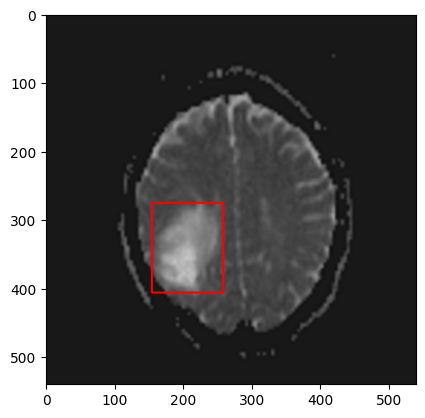

In [5]:
image = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_991.jpg")
x, y, width, height = 0.383333, 0.632407, 0.192593, 0.242593

x_min = int((x - width / 2) * image.shape[1])
y_min = int((y - height / 2) * image.shape[0])
x_max = int((x + width / 2) * image.shape[1])
y_max = int((y + height / 2) * image.shape[0])

color = (255, 0, 0)  
thickness = 2  

cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
plt.imshow(image)


### Bounding Box Rotation Function _ V1

In [ ]:
# image = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_747_CCWR_.jpg")
# x, y, width, height = 0.593519, 0.413889, 0.264815, 0.190741


# def rotation_mapper(alpha, Wi, Hi):
#     # Alpha is a value of rotation
#     alpha = math.radians(alpha)

#     # Step 0
#     sin_beta = Hi/(math.sqrt(Wi*Wi + Hi*Hi))
#     beta = math.asin(sin_beta)

#     # Step 1
#     l = Wi*(math.sin(alpha)) / (math.cos(alpha))

#     # Step 2
#     L = math.sqrt(l*l + Wi*Wi)

#     # Step 3
#     V = L * math.sqrt(2)

#     # Step 4
#     Hj = V * math.sin(beta+alpha)
#     Wj = V * math.cos(beta+alpha)

#     return Wj, Hj


# x, y = rotation_mapper(alpha = 30, Wi = x, Hi = y)

# x_min = int((x - width / 2) * image.shape[1]) + 270
# y_min = int((y - height / 2) * image.shape[0]) 
# x_max = int((x + width / 2) * image.shape[1]) + 270
# y_max = int((y + height / 2) * image.shape[0]) 

# color = (255, 0, 0)  
# thickness = 2  

# cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
# plt.imshow(image)


### Bounding Box Rotation Function _ V2

In [ ]:
# image = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_747_CCWR_.jpg")
# x, y, width, height = 0.593519, 0.413889, 0.264815, 0.190741


# def rotation_mapper(alpha, Wi, Hi):
#     # Alpha is a value of rotation
#     alpha = math.radians(alpha)

#     # Step 0
#     sin_beta = Hi/(math.sqrt(Wi*Wi + Hi*Hi))
#     beta = math.asin(sin_beta)

#     # Step 1
#     l = Wi*(math.sin(alpha)) / (math.cos(alpha))

#     # Step 2
#     L = math.sqrt(l*l + Wi*Wi)

#     # Step 3
#     V = L * math.sqrt(2)

#     # Step 4
#     Hj = V * math.sin(beta+alpha)
#     Wj = V * math.cos(beta+alpha)
    
#     # Step 5  
#     d_1 = Hi * math.tan(alpha) 
    
#     # Step 6
#     distance = d_1 * math.cos(alpha)

#     return Wj, Hj, distance



# x, y, distance = rotation_mapper(alpha = 30, Wi = x, Hi = y)

# distance = int((y - width / 2)  * image.shape[1]) - 270

# x_min = int((x - width / 2) * image.shape[1])  + 270 - int(distance/2)
# x_max = int((x + width / 2) * image.shape[1]) + 270 + int(distance/2)

# y_min = int((y - height / 2) * image.shape[0]) +  int(distance/2) 
# y_max = int((y + height / 2) * image.shape[0]) -  int(distance/2) 

# color = (255, 0, 0)  
# thickness = 2  

# cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
# plt.imshow(image)


### Bounding Box Rotation Function _ V3

In [ ]:
# image = cv2.imread("C://Users//Eurus//Desktop//TestingImagesAugmentation/init_imgs//T_747.jpg")
# x, y, width, height = 0.593519, 0.413889, 0.264815, 0.190741


# def rotation_mapper(alpha, Wi, Hi):
#     # Alpha is a value of rotation
#     alpha = math.radians(alpha)

#     # Step 0
#     V = math.sqrt(Wi*Wi + Hi*Hi)

#     # Step 1
#     Hj = V * math.cos(alpha)
#     Wj = V * math.sin(alpha)

#     # Step 2
#     distance_y = int(abs(Hj-Hi)) 
#     distance_x = int(abs(Wj-Wi))

#     return Wj, Hj, distance_x, distance_y


# x = int((x - width / 2) * image.shape[1])
# y = int((y - width / 2) * image.shape[0]) 
# width = int(width * image.shape[1])
# height = int(height * image.shape[0])

# x, y, distance_x, distance_y = rotation_mapper(alpha = 30, Wi = width, Hi = height)

# # distance_x = int((x - width / 2))  
# # distance_y = int((y - width / 2))

# # x_min = int((x - width / 2) * image.shape[1]) + distance_x
# # x_max = int((x + width / 2) * image.shape[1]) + distance_x

# x_min = int(x - width/2) +  distance_x
# x_max = int(x + width/2) +  distance_x

# # y_min = int((y - height / 2) * image.shape[0]) - distance_y
# # y_max = int((y + height / 2) * image.shape[0]) - distance_y

# y_min = int(y - width/2) + distance_y
# y_max = int(y + width/2) + distance_y

# color = (255, 0, 0)  
# thickness = 2  

# cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
# plt.imshow(image)


Xi : 50.500260000000026
Yi : 46.49994000000004
Vi : 68.64780171331931

Beta: 42.63844150940308

Theta: 72.63844150940308

Yj: 205

Xj: 290

x rotated is : 290

y rotated is : 205

distance_x is : 239

distance_y is : 158



Text(0.5, 1.0, 'Center in Rotated')

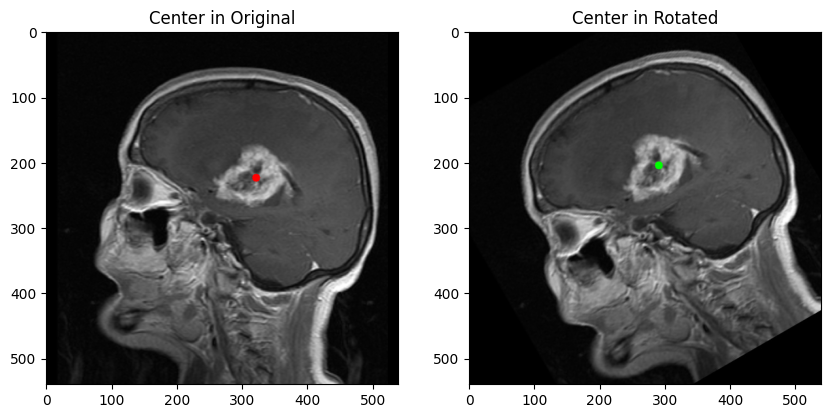

In [15]:
image_init = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_747.jpg")
image_rotated = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_747_CCWR_.jpg")
x, y, width, height = 0.593519, 0.413889, 0.264815, 0.190741


def rotation_mapper(Alpha, Xi, Yi):
    
    # Step 1
    Xi = (Xi * 540) - 270
    print(f"Xi : {Xi}")
    
    Yi = (540 - (Yi * 540)) - 270
    print(f"Yi : {Yi}")
    
    # Step 2
    Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
    print(f"Vi : {Vi}\n")
    
    # Step 3
    Beta = math.asin(Yi / Vi)
    Beta = math.degrees(Beta)
    print(f"Beta: {Beta}\n")
    
    Theta = Alpha + Beta
    print(f"Theta: {Theta}\n")
    Theta = Theta * 3.141592 / 180
    
    # Step 4
    Vj = Vi
    Yj = 540 - (int(Vj * math.sin(Theta)) + 270)
    print(f"Yj: {Yj}\n")
    Xj = int(Vj * math.cos(Theta)) + 270
    print(f"Xj: {Xj}\n")
    
    # Step 5
    distance_x = abs(int(Xj - Xi))
    distance_y = abs(int(Yj - Yi))
    
    return Xj, Yj, distance_x, distance_y 



##########################################################

x, y, distance_x, distance_y = rotation_mapper(Alpha = 30, Xi = x, Yi = y)


# x_min = int((x - width / 2) * 540)
# y_min = int((y - height / 2) * 540)
# x_max = int((x + width / 2) * 540)
# y_max = int((y + height / 2) * 540)

print(f"x rotated is : {x}\n")
print(f"y rotated is : {y}\n")
print(f"distance_x is : {distance_x}\n")
print(f"distance_y is : {distance_y}\n")


# x_min = x + distance_x 
# y_min = y + distance_y
# x_max = x + distance_x
# y_max = y + distance_y



###########################################################





color = (255, 0, 0)  
thickness = 2  

# cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
"final Center"
cv2.circle(image_rotated, (x,y), radius=0, color=(0, 255, 0), thickness=12)
"initial Center"
cv2.circle(image_init, (321,224), radius=0, color=(255, 0, 0), thickness=12)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1) 
plt.imshow(image_init)
plt.title("Center in Original")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(image_rotated)
plt.title("Center in Rotated")
  